In [1]:
from PandaSQLite import PandaSQLiteDB
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
db = PandaSQLiteDB("loop.sql", auto_commit=False)

In [3]:
db.import_data("data", "loop.csv")
# db.import_data("weak", "weak.csv")

In [6]:
db.delete_table("plt_norm")
db.execute(r"CREATE TABLE plt_norm AS " +
r"SELECT '$S_{2^{28}}^{(t)}/S_{2^{28}}^{(1)}$' as Dataset, n_threads as Threads, sn/14.648743 as x FROM data UNION " +
r"SELECT '$||\mathrm{opt}^{(t)}||^2_2/||\mathrm{opt}^{(1)}||^2_2$' as func, n_threads as Threads, norm/39.783432 as x FROM data UNION " +
r"SELECT 'Speedup' as func, n_threads, 0.249051/time as x FROM data"
)

/var/folders/nq/_5vy81mn3ydg5drl3bqg9s6m0000gn/T/ipykernel_99800/912898378.py:8: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(


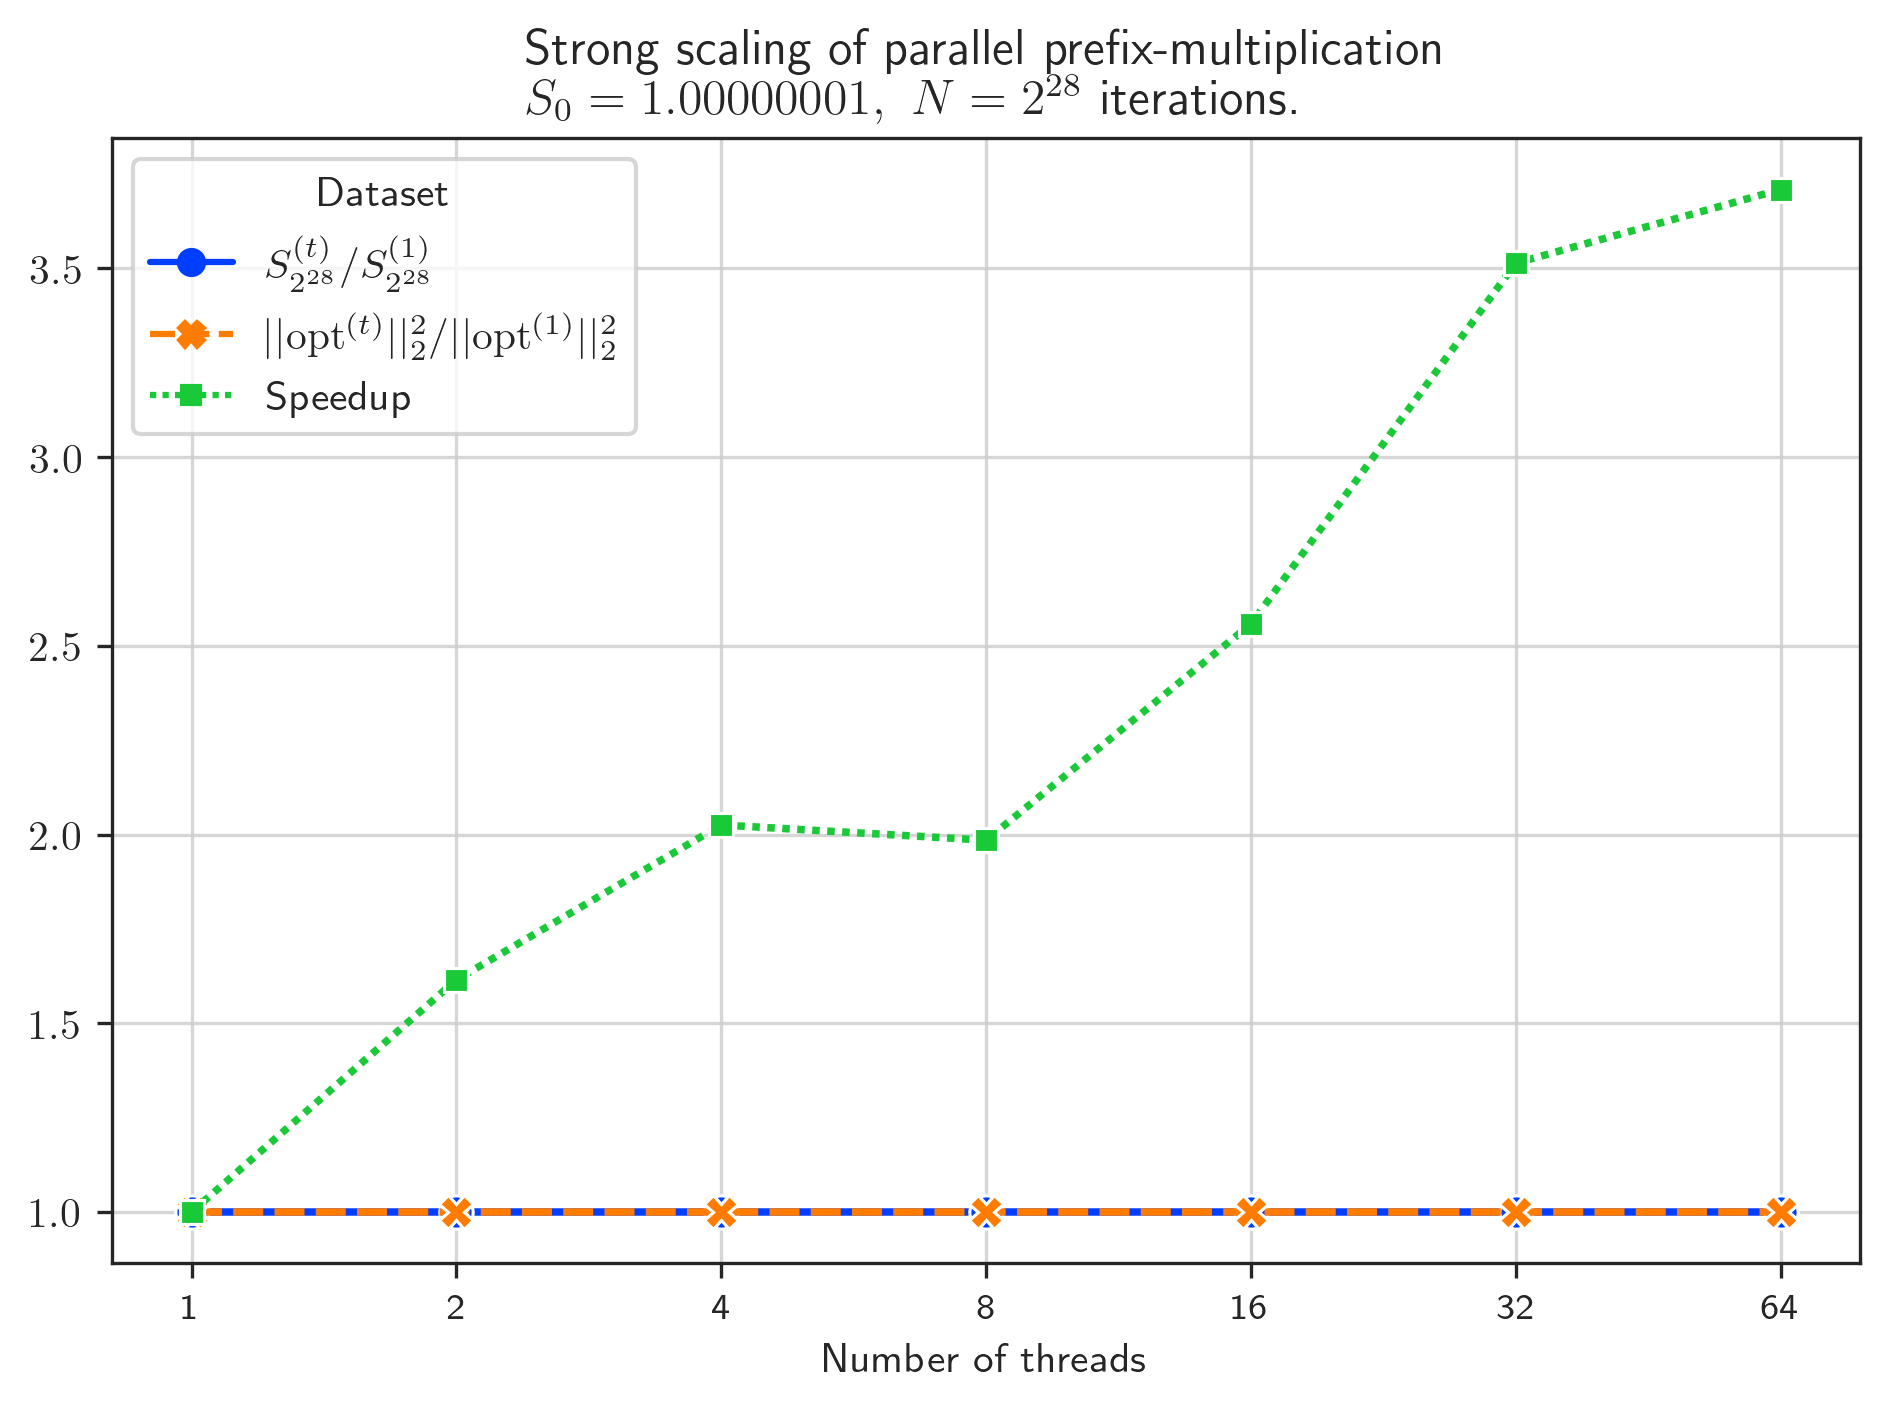

In [7]:

f, ax = plt.subplots(dpi=300)
plt.rcParams['text.usetex'] = True
sns.set_style("ticks")
pal = sns.color_palette("bright")
colors = pal.as_hex()
colors[5] = "#57b3e9"

sns.lineplot(
    data=db.get_table('plt_norm'),
    x="Threads",
    y="x",
    linewidth=1.8,
    hue="Dataset",
    style="Dataset",
    markers=True,
    markersize=8,
    palette=colors,
    errorbar=None,
    ax=ax
).set_title("Strong scaling of parallel prefix-multiplication\n$S_0 = 1.00000001, \ N=2^{28}$ iterations.")


sns.move_legend(ax, "upper left")
plt.rcParams["font.serif"] = "Times New Roman"
ax.set(ylabel="", xlabel=r'Number of threads')
ax.set_xscale('log', base=2)
plt.xticks([2**i for i in range(0,7)], [f"{2**i}" for i in range(0,7)])
# plt.yticks([100*i for i in range(1,9)], [f"{100*i}" for i in range(1,9)])
plt.tick_params(axis='x', which='major', labelsize=9)
#plt.ylim([50, 800])
plt.grid(alpha=0.8)
plt.tight_layout()
plt.savefig(f"par_prefix_strong_scaling.pdf")
#plt.savefig(f"par_prefix_strong_scaling.svg")


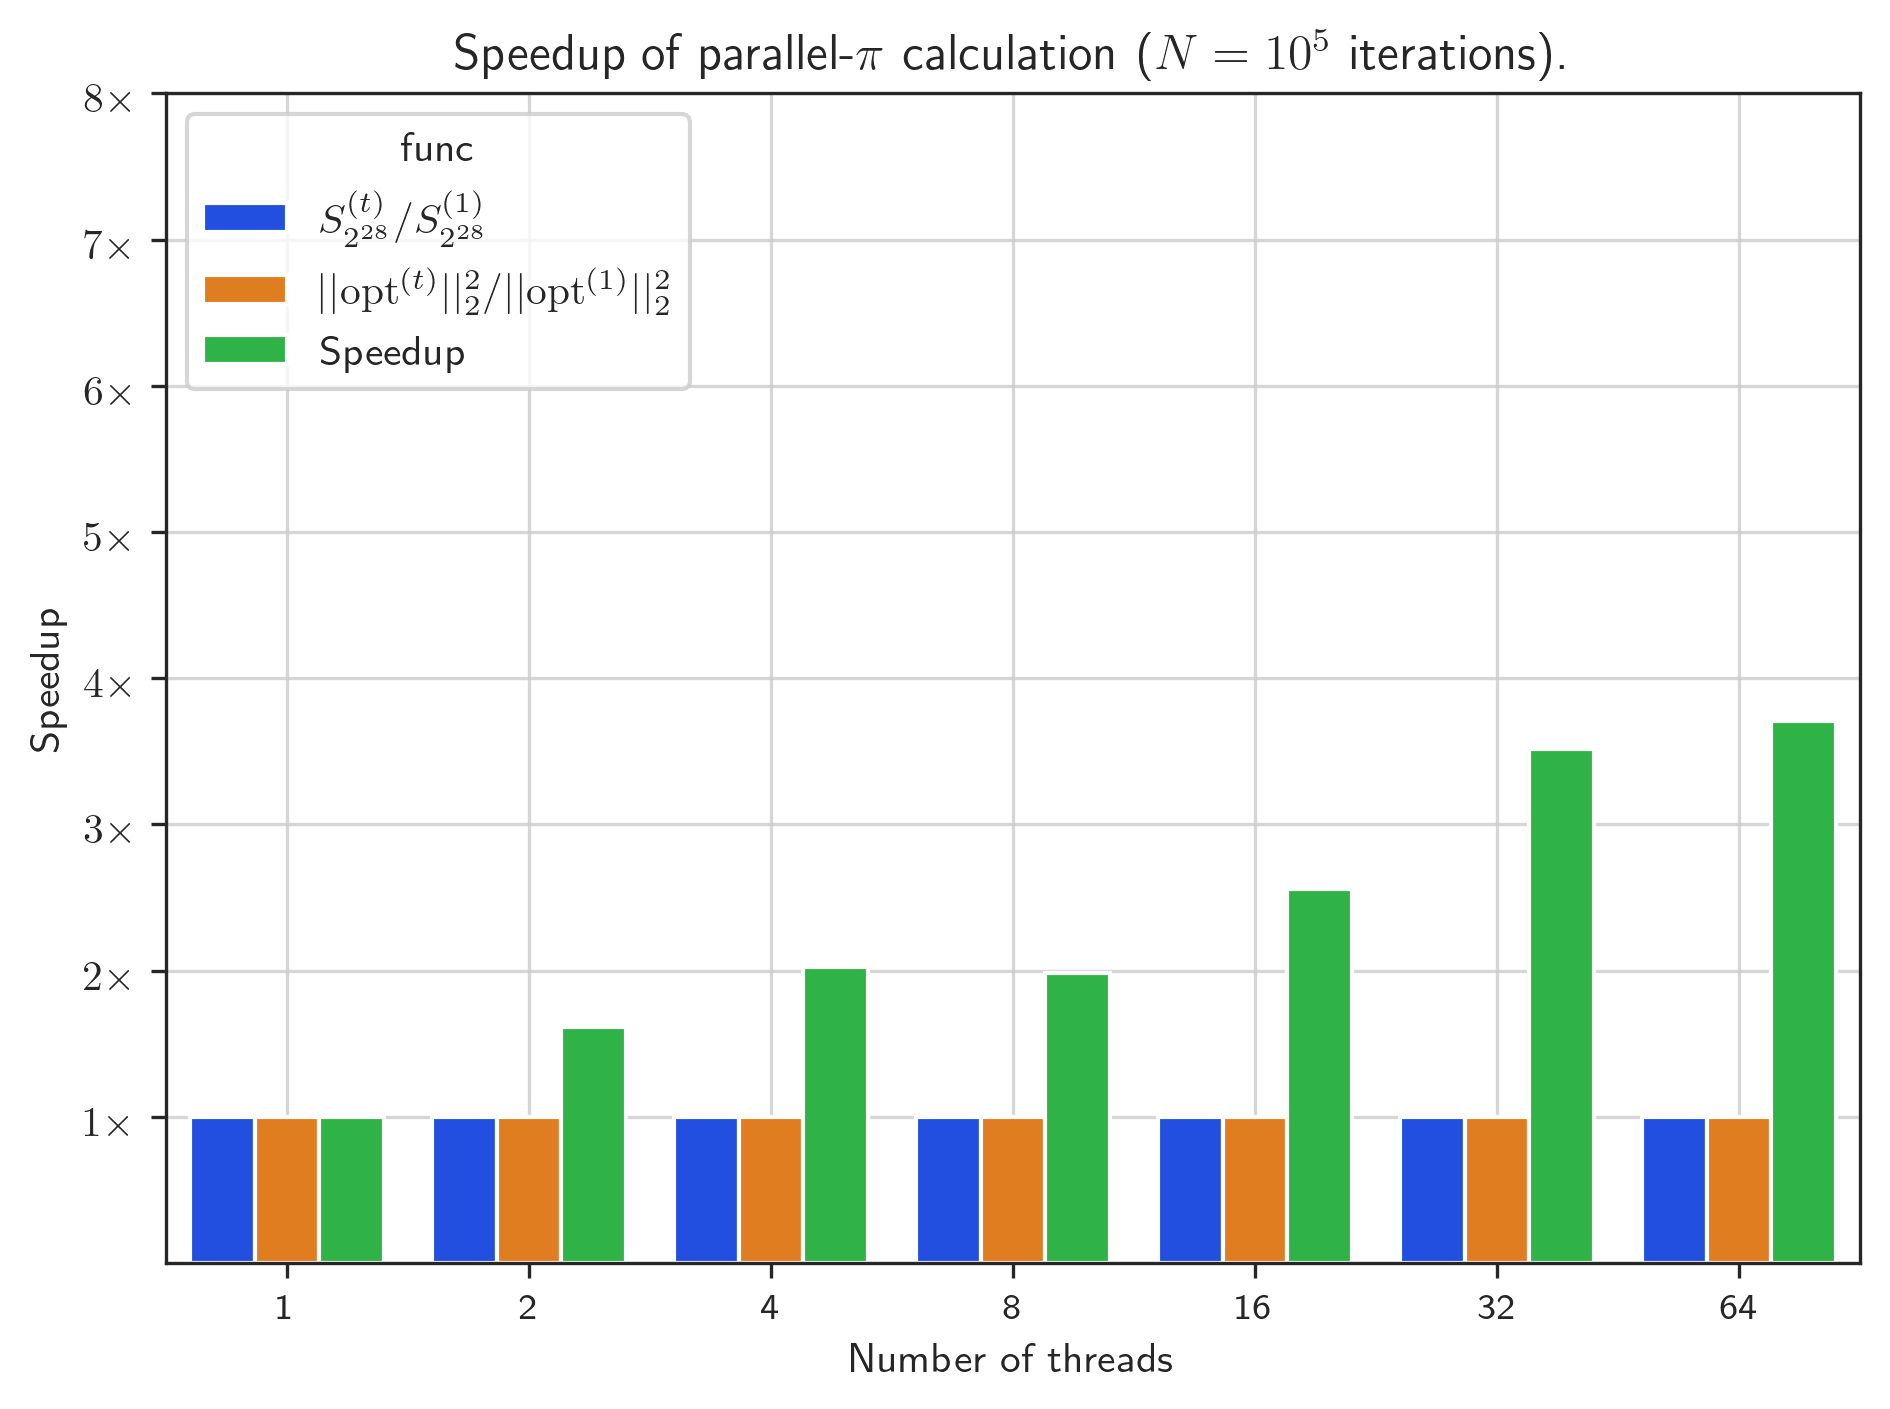

In [45]:
f, ax = plt.subplots(dpi=300)
plt.rcParams['text.usetex'] = True
sns.set_style("ticks")
pal = sns.color_palette("bright")
colors = pal.as_hex()
colors[5] = "#57b3e9"

sns.barplot(
    data=db.get_table('plt_norm'),
    x="Threads",
    y="x",
    hue="func",
    palette=colors,
    errorbar=None,
    ax=ax
).set_title("Speedup of parallel-$\pi$ calculation ($N=10^5$ iterations).")


sns.move_legend(ax, "upper left")
#plt.rcParams["font.serif"] = "Times New Roman"
ax.set(ylabel=r'Speedup', xlabel=r'Number of threads')
plt.tick_params(axis='x', which='major', labelsize=9)
plt.grid(alpha=0.8)
plt.yticks([i for i in range(1,9)], [f"${i}\\times$" for i in range(1,9)])
plt.tight_layout()
plt.savefig(f"par_pi_speedup.pdf")


/var/folders/nq/_5vy81mn3ydg5drl3bqg9s6m0000gn/T/ipykernel_99800/417062918.py:8: UserWarning: The palette list has more values (10) than needed (1), which may not be intended.
  g = sns.lineplot(


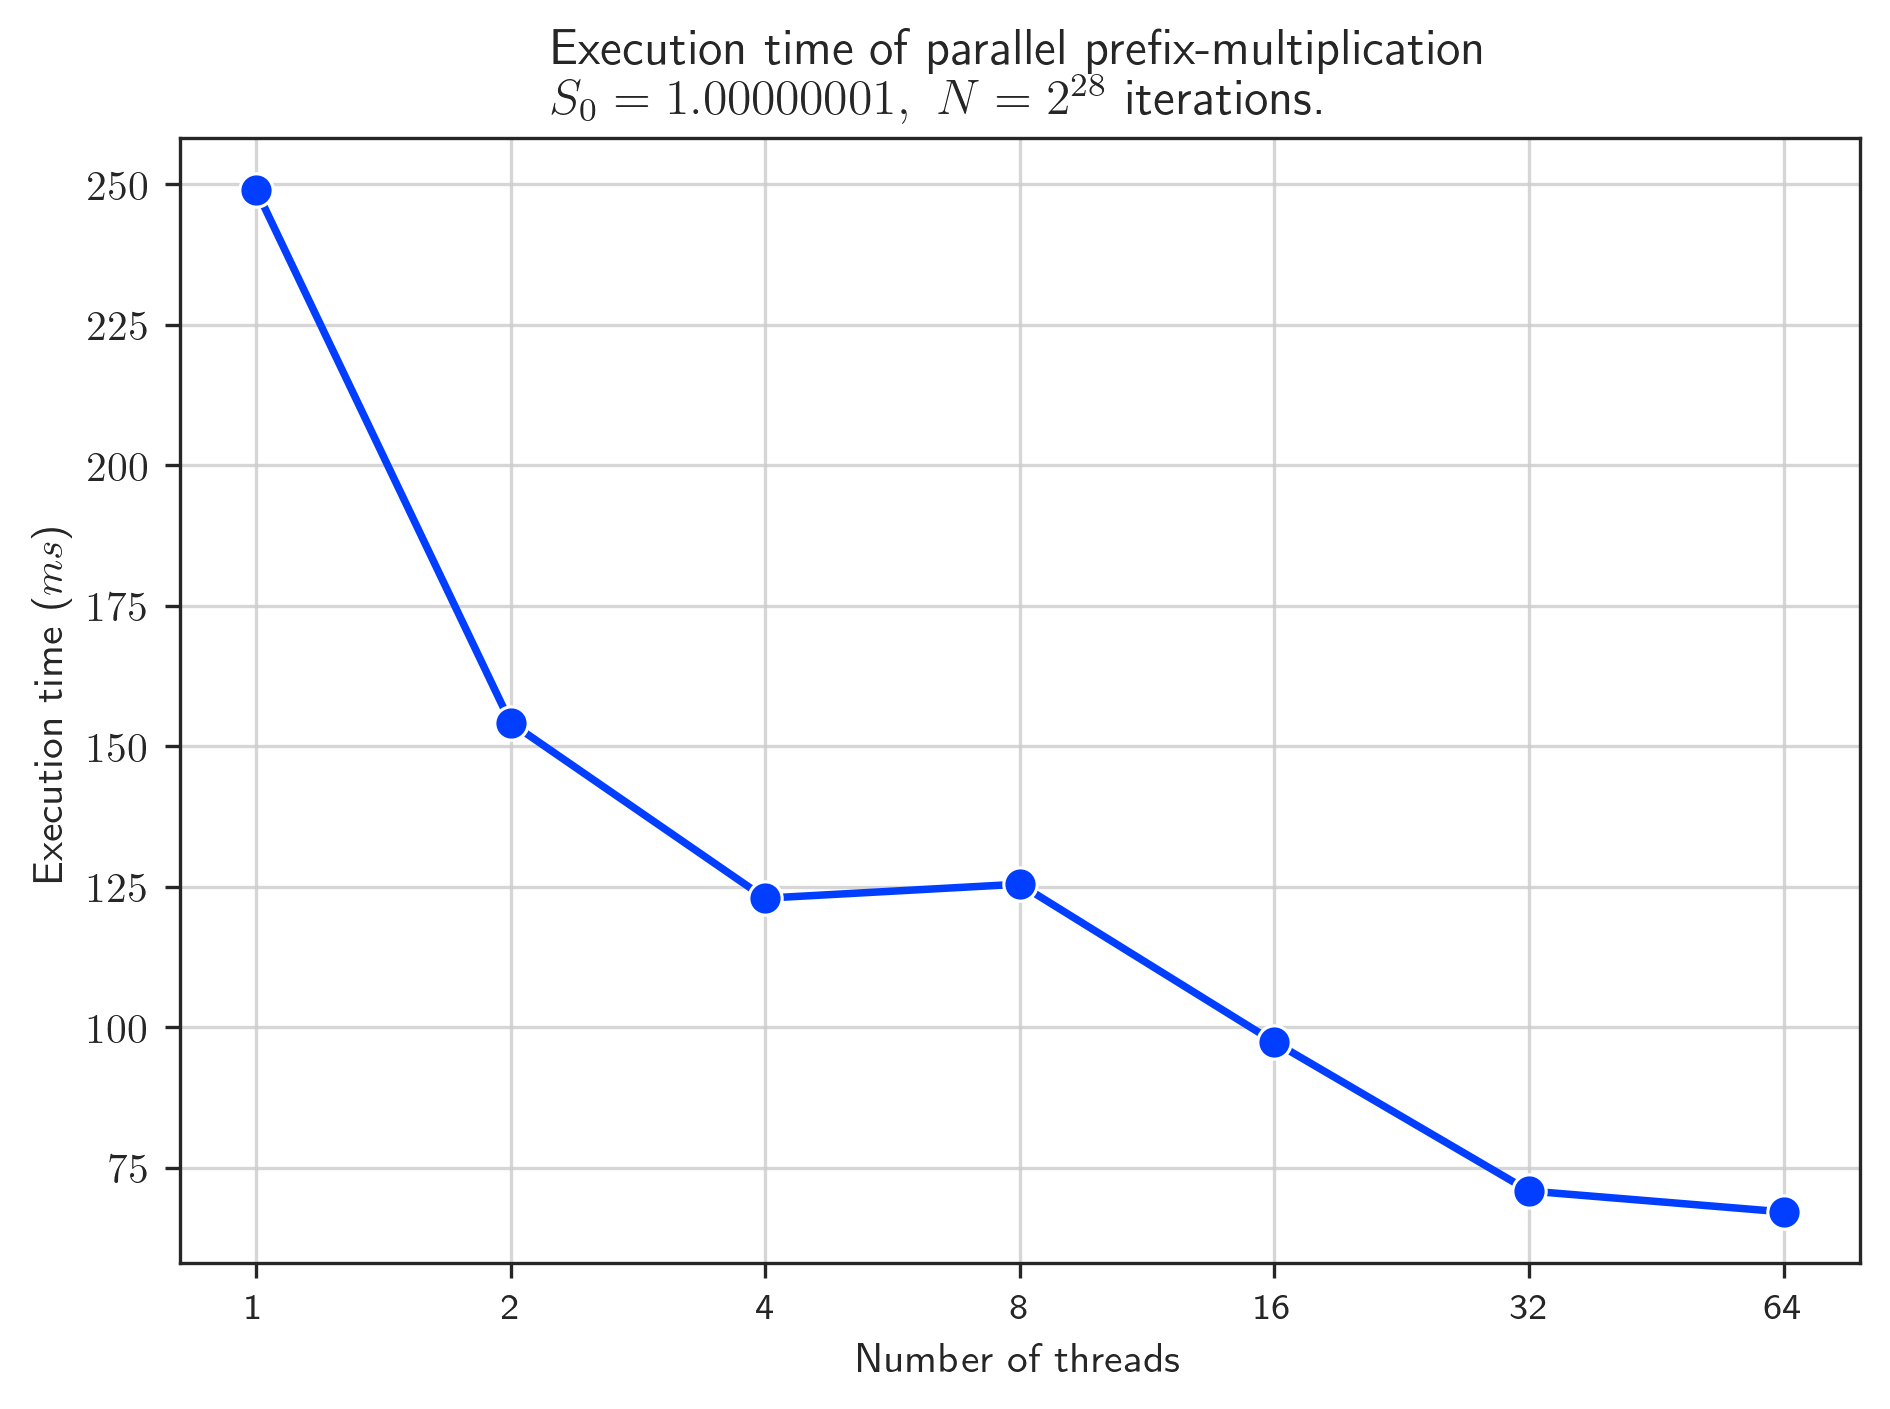

In [4]:
f, ax = plt.subplots(dpi=300)
plt.rcParams['text.usetex'] = True
sns.set_style("ticks")
pal = sns.color_palette("bright")
colors = pal.as_hex()
colors[5] = "#57b3e9"

g = sns.lineplot(
    data=db.query("SELECT Threads, x*1000 as x , func FROM plt WHERE func = 'Time'"),
    x="Threads",
    y="x",
    style="func",
    hue="func",
    linewidth=1.8,
    markers=True,
    markersize=8,
    palette=colors,
    errorbar=None,
    ax=ax
).set_title("Execution time of parallel prefix-multiplication\n$S_0 = 1.00000001, \ N=2^{28}$ iterations.")


plt.legend([],[], frameon=False)
sns.move_legend(ax, "upper left")
plt.rcParams["font.serif"] = "Times New Roman"
ax.set(ylabel="Execution time ($ms$)", xlabel=r'Number of threads')
ax.set_xscale('log', base=2)
plt.xticks([2**i for i in range(0,7)], [f"{2**i}" for i in range(0,7)])
# plt.yticks([100*i for i in range(1,9)], [f"{100*i}" for i in range(1,9)])
plt.tick_params(axis='x', which='major', labelsize=9)
#plt.ylim([50, 800])
plt.grid(alpha=0.8)
plt.tight_layout()
plt.savefig(f"par_prefix_execution_time.pdf")
#plt.savefig(f"par_prefix_execution_time.svg")

In [34]:
db.get_table("plt")

func  Threads          x
0           $S_n$        1  14.648743
1           $S_n$        2  14.648743
2           $S_n$        4  14.648743
3           $S_n$        8  14.648743
4           $S_n$       16  14.648743
5           $S_n$       32  14.648743
6           $S_n$       64  14.648743
7   $||opt||^2_2$        1  39.783432
8   $||opt||^2_2$        2  39.783432
9   $||opt||^2_2$        4  39.783432
10  $||opt||^2_2$        8  39.783432
11  $||opt||^2_2$       16  39.783432
12  $||opt||^2_2$       32  39.783432
13  $||opt||^2_2$       64  39.783432
14           Time        1   0.249051
15           Time        2   0.154191
16           Time        4   0.122966
17           Time        8   0.125464
18           Time       16   0.097369
19           Time       32   0.070872
20           Time       64   0.067144